<a href="https://colab.research.google.com/github/garfield-gray/DataMining/blob/main/Classification_%26_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time


#Theoretical

#Imperical

In [3]:
# Address of files
%cd /content/drive/MyDrive/Uni/Data/DataMining/Winter2024/CA#4
!ls

/content/drive/MyDrive/Uni/Data/DataMining/Winter2024/CA#4
 CA4.pdf   CA#4Report.docx  'Classification_&_ML.ipynb'   Question_1.csv   Question_2.csv


##Queton_1

###Load

In [4]:
df = pd.read_csv('Question_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

###Preprocessing

In [5]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [6]:
for i in df.columns:
  print(df[i].unique())

[    0     1     2 ... 61066 61067 61068]
[15.26 16.6  14.07 ... 22.85 21.8  20.42]
['x' 'f' 'p' 'b' 'c' 's' 'o']
['g' 'h' nan 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']
['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
['f' 't']
['e' nan 'a' 'd' 's' 'x' 'p' 'f']
[nan 'c' 'd' 'f']
['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
[16.95 17.99 17.8  ...  1.23  1.16  0.  ]
[17.09 18.19 17.74 ... 32.59 30.99 30.51]
['s' nan 'b' 'r' 'c' 'f']
['y' nan 's' 'k' 'i' 'h' 't' 'g' 'f']
['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
['u' nan]
['w' 'y' nan 'n' 'e' 'u' 'k']
['t' 'f']
['g' 'p' 'e' 'l' 'f' 'm' nan 'r' 'z']
[nan 'w' 'p' 'k' 'r' 'u' 'n' 'g']
['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']
['w' 'u' 'a' 's']
['p' 'e']


####A

In [7]:

missing_values_count = df.isnull().sum()


data_types = df.dtypes


missing_info = pd.concat([missing_values_count, data_types], axis=1)
missing_info.columns = ['Missing Values', 'Data Type']

print(missing_info)


                      Missing Values Data Type
Unnamed: 0                         0     int64
cap-diameter                       0   float64
cap-shape                          0    object
cap-surface                    14120    object
cap-color                          0    object
does-bruise-or-bleed               0    object
gill-attachment                 9884    object
gill-spacing                   25063    object
gill-color                         0    object
stem-height                        0   float64
stem-width                         0   float64
stem-root                      51538    object
stem-surface                   38124    object
stem-color                         0    object
veil-type                      57892    object
veil-color                     53656    object
has-ring                           0    object
ring-type                       2471    object
spore-print-color              54715    object
habitat                            0    object
season       

In [8]:
df.isnull().mean()

Unnamed: 0              0.000000
cap-diameter            0.000000
cap-shape               0.000000
cap-surface             0.231214
cap-color               0.000000
does-bruise-or-bleed    0.000000
gill-attachment         0.161850
gill-spacing            0.410405
gill-color              0.000000
stem-height             0.000000
stem-width              0.000000
stem-root               0.843931
stem-surface            0.624277
stem-color              0.000000
veil-type               0.947977
veil-color              0.878613
has-ring                0.000000
ring-type               0.040462
spore-print-color       0.895954
habitat                 0.000000
season                  0.000000
class                   0.000000
dtype: float64

####B

In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer



threshold = 0.5

columns_to_drop = df.columns[df.isnull().mean() > threshold]
df_dropped = df.drop(columns=columns_to_drop)

numerical_columns = df_dropped.select_dtypes(include=['number']).columns
categorical_columns = df_dropped.select_dtypes(include=['object', 'category']).columns


numerical_imputer = SimpleImputer(strategy='mean')
df_imputed_numerical = pd.DataFrame(numerical_imputer.fit_transform(df_dropped[numerical_columns]), columns=numerical_columns)


categorical_imputer = SimpleImputer(strategy='most_frequent')
df_imputed_categorical = pd.DataFrame(categorical_imputer.fit_transform(df_dropped[categorical_columns]), columns=categorical_columns)


df_imputed = pd.concat([df_imputed_numerical, df_imputed_categorical], axis=1)


print("Original DataFrame shape:", df.shape)
print("DataFrame shape after dropping columns:", df_dropped.shape)
print("DataFrame shape after imputation:", df_imputed.shape)


Original DataFrame shape: (61069, 22)
DataFrame shape after dropping columns: (61069, 17)
DataFrame shape after imputation: (61069, 17)


In [10]:
df_imputed['cap-shape'].value_counts()

cap-shape
x    26934
f    13404
s     7164
b     5694
o     3460
p     2598
c     1815
Name: count, dtype: int64

In [11]:
pd.get_dummies(df_imputed['cap-shape'])

b      c      f      o      p      s      x
0      False  False  False  False  False  False   True
1      False  False  False  False  False  False   True
2      False  False  False  False  False  False   True
3      False  False   True  False  False  False  False
4      False  False  False  False  False  False   True
...      ...    ...    ...    ...    ...    ...    ...
61064  False  False  False  False  False   True  False
61065  False  False   True  False  False  False  False
61066  False  False  False  False  False   True  False
61067  False  False   True  False  False  False  False
61068  False  False  False  False  False   True  False

[61069 rows x 7 columns]

####C

In [12]:

df_encoded = pd.get_dummies(df_imputed, columns=categorical_columns)

In [13]:
df_encoded

Unnamed: 0  cap-diameter  stem-height  stem-width  cap-shape_b  \
0             0.0         15.26        16.95       17.09        False   
1             1.0         16.60        17.99       18.19        False   
2             2.0         14.07        17.80       17.74        False   
3             3.0         14.17        15.77       15.98        False   
4             4.0         14.64        16.53       17.20        False   
...           ...           ...          ...         ...          ...   
61064     61064.0          1.18         3.93        6.22        False   
61065     61065.0          1.27         3.18        5.43        False   
61066     61066.0          1.27         3.86        6.37        False   
61067     61067.0          1.24         3.56        5.44        False   
61068     61068.0          1.17         3.25        5.45        False   

       cap-shape_c  cap-shape_f  cap-shape_o  cap-shape_p  cap-shape_s  ...  \
0            False        False        False        False        False  ...   
1            False        False        False        False        False  ...   
2            False        False        False        False        False  ...   
3            False         True        False        False        False  ...   
4            False        False        False        False        False  ...   
...            ...          ...          ...          ...          ...  ...   
61064        False        False        False        False         True  ...   
61065        False         True        False        False        False  ...   
61066        False        False        False        False         True  ...   
61067        False         True        False        False        False  ...   
61068        False        False        False        False         True  ...   

       habitat_m  habitat_p  habitat_u  habitat_w  season_a  season_s  \
0          False      False      False      False     False     False   
1          False      False      False      False     False     False   
2          False      False      False      False     False     False   
3          False      False      False      False     False     False   
4          False      False      False      False     False     False   
...          ...        ...        ...        ...       ...       ...   
61064      False      False      False      False      True     False   
61065      False      False      False      False      True     False   
61066      False      False      False      False     False     False   
61067      False      False      False      False     False     False   
61068      False      False      False      False     False     False   

       season_u  season_w  class_e  class_p  
0         False      True    False     True  
1          True     False    False     True  
2         False      True    False     True  
3         False      True    False     True  
4         False      True    False     True  
...         ...       ...      ...      ...  
61064     False     False    False     True  
61065     False     False    False     True  
61066      True     False    False     True  
61067      True     False    False     True  
61068      True     False    False     True  

[61069 rows x 95 columns]

####D

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df_encoded[numerical_columns]), columns=numerical_columns)

In [15]:
df_final = pd.concat([df_normalized, df_encoded.drop(columns=numerical_columns)], axis=1)

df_final['cap-diameter'].min()


-1.206855392497904

In [16]:
df_final = df_final.drop(columns = 'Unnamed: 0')
df_final

cap-diameter  stem-height  stem-width  cap-shape_b  cap-shape_c  \
0          1.619462     3.076705    0.492293        False        False   
1          1.873982     3.385311    0.601900        False        False   
2          1.393432     3.328931    0.557061        False        False   
3          1.412426     2.726555    0.381690        False        False   
4          1.501699     2.952075    0.503254        False        False   
...             ...          ...         ...          ...          ...   
61064     -1.054903    -0.786809   -0.590822        False        False   
61065     -1.037808    -1.009362   -0.669539        False        False   
61066     -1.037808    -0.807581   -0.575875        False        False   
61067     -1.043506    -0.896602   -0.668543        False        False   
61068     -1.056802    -0.988590   -0.667546        False        False   

       cap-shape_f  cap-shape_o  cap-shape_p  cap-shape_s  cap-shape_x  ...  \
0            False        False        False        False         True  ...   
1            False        False        False        False         True  ...   
2            False        False        False        False         True  ...   
3             True        False        False        False        False  ...   
4            False        False        False        False         True  ...   
...            ...          ...          ...          ...          ...  ...   
61064        False        False        False         True        False  ...   
61065         True        False        False        False        False  ...   
61066        False        False        False         True        False  ...   
61067         True        False        False        False        False  ...   
61068        False        False        False         True        False  ...   

       habitat_m  habitat_p  habitat_u  habitat_w  season_a  season_s  \
0          False      False      False      False     False     False   
1          False      False      False      False     False     False   
2          False      False      False      False     False     False   
3          False      False      False      False     False     False   
4          False      False      False      False     False     False   
...          ...        ...        ...        ...       ...       ...   
61064      False      False      False      False      True     False   
61065      False      False      False      False      True     False   
61066      False      False      False      False     False     False   
61067      False      False      False      False     False     False   
61068      False      False      False      False     False     False   

       season_u  season_w  class_e  class_p  
0         False      True    False     True  
1          True     False    False     True  
2         False      True    False     True  
3         False      True    False     True  
4         False      True    False     True  
...         ...       ...      ...      ...  
61064     False     False    False     True  
61065     False     False    False     True  
61066      True     False    False     True  
61067      True     False    False     True  
61068      True     False    False     True  

[61069 rows x 94 columns]

####E

In [17]:
df_final['class_e'].value_counts()

class_e
False    33888
True     27181
Name: count, dtype: int64

In [18]:
# it's been decided to work with this dataset but we may change our mind!

###Classification

####A

In [19]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target (y)
X = df_final.drop(columns=['class_e', 'class_p'])
y = df_final['class_p'] # taking poisonous as the target

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (48855, 92)
Shape of X_test: (12214, 92)
Shape of y_train: (48855,)
Shape of y_test: (12214,)


####B

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier on the training data
tree_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

####C

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier with K=9
knn_classifier = KNeighborsClassifier(n_neighbors=9)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=9)

####D

In [22]:

# Measure the execution time for training the decision tree
start_time_dt = time.time()
tree_classifier.fit(X_train, y_train)
end_time_dt = time.time()
execution_time_dt = end_time_dt - start_time_dt
print("Execution time for training the decision tree:", execution_time_dt, "seconds")

# Measure the execution time for training the KNN model
start_time_knn = time.time()
knn_classifier.fit(X_train, y_train)
end_time_knn = time.time()
execution_time_knn = end_time_knn - start_time_knn
print("Execution time for training the KNN model:", execution_time_knn, "seconds")


# KNN is way less beacause meaning that it does not explicitly build a model during the training phase

Execution time for training the decision tree: 1.25722074508667 seconds
Execution time for training the KNN model: 0.1299910545349121 seconds


In [23]:
# Importing necessary modules
import time

# Measure the prediction time for the decision tree
start_time_dt_pred = time.time()
tree_pred = tree_classifier.predict(X_test)
end_time_dt_pred = time.time()
prediction_time_dt = end_time_dt_pred - start_time_dt_pred
print("Prediction time for decision tree:", prediction_time_dt, "seconds")

# Measure the prediction time for the KNN model
start_time_knn_pred = time.time()
knn_pred = knn_classifier.predict(X_test)
end_time_knn_pred = time.time()
prediction_time_knn = end_time_knn_pred - start_time_knn_pred
print("Prediction time for KNN model:", prediction_time_knn, "seconds")


Prediction time for decision tree: 0.02227783203125 seconds
Prediction time for KNN model: 6.747439861297607 seconds


In [ ]:
# The differences in training and prediction times between the decision tree and KNN models can influence their suitability for different applications. Here's how each model's characteristics can inform their applications:

# 1. **Decision Tree:**
#    - **Training Time:** Decision trees typically have fast training times since they involve recursive partitioning of the feature space.
#    - **Prediction Time:** Prediction with decision trees is also fast since it involves traversing the tree structure to make predictions.
#    - **Applications:** Decision trees are well-suited for applications where interpretability and ease of understanding are important, such as:
#      - Classification tasks where explainability of the model's decision-making process is crucial.
#      - Decision support systems where human-readable rules are needed for decision-making.
#      - Real-time applications where fast prediction times are required.

# 2. **K-Nearest Neighbors (KNN):**
#    - **Training Time:** KNN is a lazy learner, so it doesn't involve explicit model training during the training phase. Instead, it stores all training instances.
#    - **Prediction Time:** Prediction with KNN can be slower, especially for large datasets, since it requires computing distances to all training instances.
#    - **Applications:** KNN is suitable for applications where the concept of similarity or distance is important, such as:
#      - Recommender systems where users are recommended items based on similar users' preferences.
#      - Anomaly detection where anomalies are detected based on their dissimilarity to normal instances.
#      - Small to medium-sized datasets where computational resources are not a constraint.

# In summary, decision trees are preferable when you need a fast and interpretable model, while KNN is suitable when you need to consider similarity or distance between instances and computational resources are not a concern. Understanding the trade-offs between training and prediction times can help you choose the most appropriate model for your specific application requirements.

####E

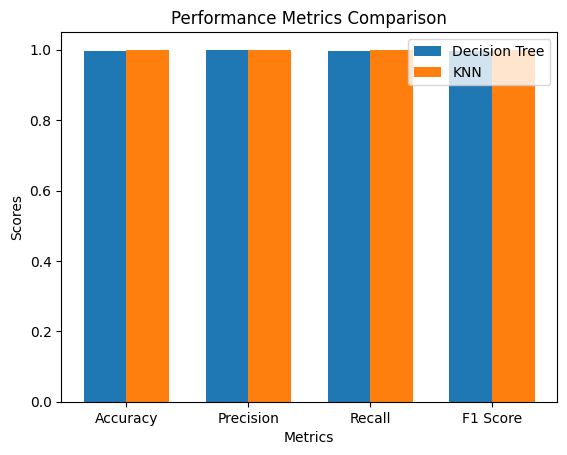

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Train decision tree classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Train KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train, y_train)

# Predictions
tree_pred = tree_classifier.predict(X_test)
knn_pred = knn_classifier.predict(X_test)

# Calculate metrics for decision tree
dt_accuracy = accuracy_score(y_test, tree_pred)
dt_precision = precision_score(y_test, tree_pred, pos_label=True)
dt_recall = recall_score(y_test, tree_pred, pos_label=True)
dt_f1 = f1_score(y_test, tree_pred, pos_label=True)

# Calculate metrics for KNN
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, pos_label=True)
knn_recall = recall_score(y_test, knn_pred, pos_label=True)
knn_f1 = f1_score(y_test, knn_pred, pos_label=True)

# Store metrics in arrays
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1]
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]

# Plotting bar chart
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, dt_scores, width, label='Decision Tree')
rects2 = ax.bar(x + width/2, knn_scores, width, label='KNN')

# Adding labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Displaying the plot
plt.show()


In [31]:
print(dt_accuracy ,dt_precision ,dt_recall ,dt_f1)


print(knn_accuracy ,knn_precision,knn_recall ,knn_f1 )


0.9972163091534305 0.9985350131848814 0.9964912280701754 0.9975120737596955
0.9998362534796136 0.9997076878105817 1.0 0.9998538225405642


####F

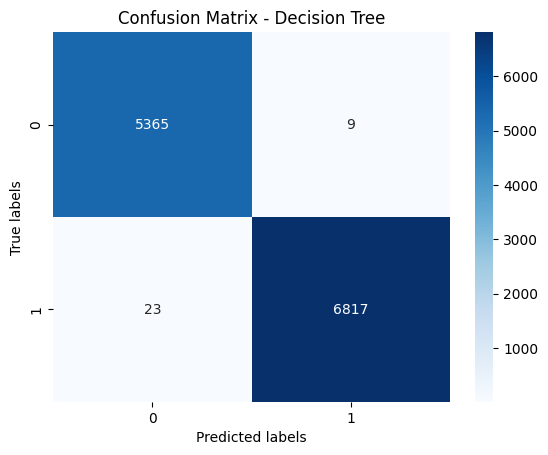

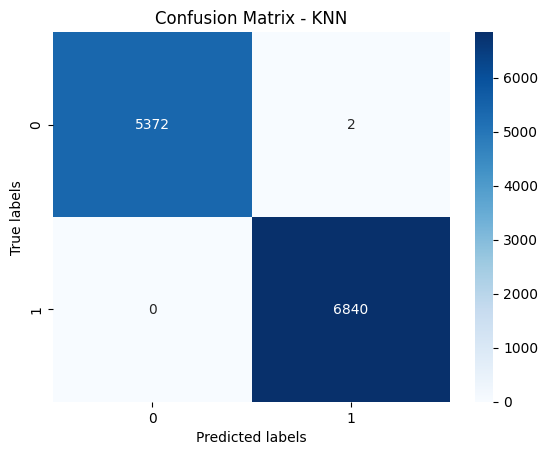

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()

# Plot confusion matrix for decision tree
plot_confusion_matrix(y_test, tree_pred, "Confusion Matrix - Decision Tree")

# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, knn_pred, "Confusion Matrix - KNN")


####G

In [28]:
from sklearn.tree import plot_tree

# Plot decision tree
plt.figure(figsize=(30,20), dpi=500)
plot_tree(tree_classifier, filled=True, feature_names=X.columns, class_names=["edible", "poisonous"])
plt.show()


##Question_2

###Load

In [ ]:
rawdata = pd.read_csv('Question_2.csv')
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


###Data Creation